In [129]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters, StatsBase

include("./utils/import.jl")
using .Import
using ..Import: State

include("./utils/figs.jl")
using .Figs

In [2]:
function print_state(s::State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d1: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d1: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

print_state (generic function with 1 method)

## Set Parameters
### Experiment Names

In [3]:
# y8_expID = "22914_23519"
# y9_expID = "22915_02260"
# y99_expID = "22915_095011"
# y999_expID = "22927_082018"

# exp_ID = "22105_173919"
# rand_B_ID = "base_rand_B_22105_180629"
# rand_all_ID = "base_rand_act_22105_18061"

# exp_ID = "22107_153616"
# rand_B_ID = "base_rand_B_22107_160713"
# rand_all_ID = "base_rand_act_22107_160645"

full_expIDs = ["221026_172915", "221026_17425", "221026_175447", "221026_180544", "221026_181538"]
part_expIDs = ["221026_182322", "221026_183358", "221026_184451", "221026_185730", "221026_190522"]

5-element Vector{String}:
 "221026_182322"
 "221026_183358"
 "221026_184451"
 "221026_185730"
 "221026_190522"

### Experiment Parameters

In [4]:
runs = 5
# actions = ["C1", "C2", "C3", "B1", "B2"]
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]

# y8, y9, y99, y999 = 0.8, 0.9, 0.99, 0.999
# exp_name, rand_B_name, rand_all_name = "POMCPOW", "random Bs", "random actions"
full_name, part_name = "full range", "partial range"
;

### Plotting Parameters

In [5]:
window = 100

# y_labels = ["y=0.8" "y=0.9" "y=0.99" "y=0.999"]
# labels = [exp_name rand_B_name rand_all_name]
labels = [full_name part_name]
;

## Import Data

In [6]:
@time begin
    println("importing exp="*string(full_name)*"1 (exp "*full_expIDs[1]*") data...")
    s_f1, t_f1, a_f1, r_f1, beliefs_f1, final_states_f1, avg_belief_f1, avg_belief_u_f1 = Import.import_experiment(full_expIDs[1], runs)
end;

importing exp=full range1 (exp 221026_172915) data...
 50.417378 seconds (403.76 M allocations: 15.581 GiB, 4.24% gc time, 1.62% compilation time)


In [7]:
@time begin
    println("importing exp="*string(full_name)*"2 (exp "*full_expIDs[2]*") data...")
    s_f2, t_f2, a_f2, r_f2, beliefs_f2, final_states_f2, avg_belief_f2, avg_belief_u_f2 = Import.import_experiment(full_expIDs[2], runs)
end
@time begin
    println("importing exp="*string(full_name)*"3 (exp "*full_expIDs[3]*") data...")
    s_f3, t_f3, a_f3, r_f3, beliefs_f3, final_states_f3, avg_belief_f3, avg_belief_u_f3 = Import.import_experiment(full_expIDs[3], runs)
end;

importing exp=full range2 (exp 221026_17425) data...
 49.288582 seconds (398.47 M allocations: 15.317 GiB, 4.05% gc time)
importing exp=full range3 (exp 221026_175447) data...
 49.122631 seconds (398.70 M allocations: 15.320 GiB, 3.07% gc time)


In [8]:
@time begin
    println("importing exp="*string(full_name)*"4 (exp "*full_expIDs[4]*") data...")
    s_f4, t_f4, a_f4, r_f4, beliefs_f4, final_states_f4, avg_belief_f4, avg_belief_u_f4 = Import.import_experiment(full_expIDs[4], runs)
end
@time begin
    println("importing exp="*string(full_name)*"5 (exp "*full_expIDs[5]*") data...")
    s_f5, t_f5, a_f5, r_f5, beliefs_f5, final_states_f5, avg_belief_f5, avg_belief_u_f5 = Import.import_experiment(full_expIDs[5], runs)
end;

importing exp=full range4 (exp 221026_180544) data...
 49.976236 seconds (398.64 M allocations: 15.317 GiB, 4.53% gc time)
importing exp=full range5 (exp 221026_181538) data...
 49.270766 seconds (398.65 M allocations: 15.318 GiB, 3.21% gc time)


In [9]:
@time begin
    println("importing exp="*string(part_name)*"1 (exp "*part_expIDs[1]*") data...")
    s_p1, t_p1, a_p1, r_p1, beliefs_p1, final_states_p1, avg_belief_p1, avg_belief_u_p1 = Import.import_experiment(part_expIDs[1], runs)
end
@time begin
    println("importing exp="*string(part_name)*"2 (exp "*part_expIDs[2]*") data...")
    s_p2, t_p2, a_p2, r_p2, beliefs_p2, final_states_p2, avg_belief_p2, avg_belief_u_p2 = Import.import_experiment(part_expIDs[2], runs)
end
@time begin
    println("importing exp="*string(part_name)*"3 (exp "*part_expIDs[3]*") data...")
    s_p3, t_p3, a_p3, r_p3, beliefs_p3, final_states_p3, avg_belief_p3, avg_belief_u_p3 = Import.import_experiment(part_expIDs[3], runs)
end;

importing exp=partial range1 (exp 221026_182322) data...
 49.880403 seconds (398.70 M allocations: 15.322 GiB, 3.33% gc time)
importing exp=partial range2 (exp 221026_183358) data...
 49.396610 seconds (398.68 M allocations: 15.320 GiB, 3.12% gc time)
importing exp=partial range3 (exp 221026_184451) data...
 51.360226 seconds (398.65 M allocations: 15.318 GiB, 5.83% gc time)


In [10]:
@time begin
    println("importing exp="*string(part_name)*"4 (exp "*part_expIDs[4]*") data...")
    s_p4, t_p4, a_p4, r_p4, beliefs_p4, final_states_p4, avg_belief_p4, avg_belief_u_p4 = Import.import_experiment(part_expIDs[4], runs)
end
@time begin
    println("importing exp="*string(part_name)*"5 (exp "*part_expIDs[5]*") data...")
    s_p5, t_p5, a_p5, r_p5, beliefs_p5, final_states_p5, avg_belief_p5, avg_belief_u_p5 = Import.import_experiment(part_expIDs[5], runs)
end;

importing exp=partial range4 (exp 221026_185730) data...
 49.761996 seconds (398.64 M allocations: 15.321 GiB, 3.00% gc time)
importing exp=partial range5 (exp 221026_190522) data...
 49.612809 seconds (398.25 M allocations: 15.315 GiB, 3.39% gc time)


In [93]:
# combine data across experiments for each condition (full, partial)
t_f = t_f1
s_f = [cat(s_f1, s_f2, s_f3, s_f4, s_f5, dims=1)[runs*i] for i in 1:5]
a_f = cat(a_f1, a_f2, a_f3, a_f4, a_f5,  dims=1)
r_f = cat(r_f1, r_f2, r_f3, r_f4, r_f5, dims=1)

t_p = t_p1
s_p = [cat(s_p1, s_p2, s_p3, s_p4, s_p5, dims=1)[runs*i] for i in 1:5]
a_p = cat(a_p1, a_p2, a_p3, a_p4, a_p5, dims=1)
r_p = cat(r_p1, r_p2, r_p3, r_p4, r_p5, dims=1)
;

In [12]:
# @time begin
#     println("importing exp="*string(exp_name)*" (exp "*exp_ID*") data...")
#     s, t, a, r, beliefs, final_states, avg_belief, avg_belief_u = Import.import_experiment(exp_ID, runs)
# end;

In [13]:
# @time begin
#     println("importing baseline exp="*string(rand_B_name)*" (exp "*rand_B_ID*") data...")
#     B_s, B_t, B_a, B_r = Import.get_star(rand_B_ID, runs)
# end;

In [14]:
# @time begin
#     println("importing baseline exp="*string(rand_all_name)*" (exp "*rand_all_ID*") data...")
#     r_s, r_t, r_a, r_r = Import.get_star(rand_all_ID, runs)
# end;

In [15]:
# @time begin
#     println("importing y="*string(y8)*" (exp "*y8_expID*") data...")
#     y8_s, y8_t, y8_a, y8_r, y8_beliefs, y8_final_states, y8_avg_belief, y8_avg_belief_u = Import.import_experiment(y8_expID, runs)
# end;

In [16]:
# @time begin
#     println("importing y="*string(y9)*" (exp "*y9_expID*") data...")
#     y9_s, y9_t, y9_a, y9_r, y9_beliefs, y9_final_states, y9_avg_belief, y9_avg_belief_u = Import.import_experiment(y9_expID, runs)
# end;

In [17]:
# @time begin
#     println("importing y="*string(y99)*" (exp "*y99_expID*") data...")
#     y99_s, y99_t, y99_a, y99_r, y99_beliefs, y99_final_states, y99_avg_belief, y99_avg_belief_u = Import.import_experiment(y99_expID, runs)
# end;

In [18]:
# @time begin
#     println("importing y="*string(y999)*" (exp "*y999_expID*") data...")
#     y999_s, y999_t, y999_a, y999_r, y999_beliefs, y999_final_states, y999_avg_belief, y999_avg_belief_u = Import.import_experiment(y999_expID, runs)
# end;

## Analysis
### General

In [57]:
# all runs under a given expID have the same start state & optimal action
println("** FULL range condition **")
for i in 1:length(full_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_f[i])

    println("State "*string(i)*":")
    print_state(s_f[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*"\n")
end
println("\n** PARTIAL range condition **")
for i in 1:length(full_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_p[i])
    
    println("State "*string(i)*":")
    print_state(s_p[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*"\n")
end

** FULL range condition **
State 1:
	 u: [10.0, 1.6666666666666667, 0.0]
	 d1: [0.0, 0.6666666666666666, 0.33333333333333337]	 (exp val 1.1111111111111112)
	 d1: [0.0, 0.3333333333333333, 0.6666666666666667]	 (exp val 0.5555555555555556)
	 d1: [0.0, 0.16666666666666666, 0.8333333333333334]	 (exp val 0.2777777777777778)
Highest-Reward Arm:	C1

State 2:
	 u: [10.0, 3.3333333333333335, 0.0]
	 d1: [0.0, 0.6666666666666666, 0.33333333333333337]	 (exp val 2.2222222222222223)
	 d1: [0.0, 0.3333333333333333, 0.6666666666666667]	 (exp val 1.1111111111111112)
	 d1: [0.0, 0.16666666666666666, 0.8333333333333334]	 (exp val 0.5555555555555556)
Highest-Reward Arm:	C1

State 3:
	 u: [10.0, 5.0, 0.0]
	 d1: [0.0, 0.6666666666666666, 0.33333333333333337]	 (exp val 3.333333333333333)
	 d1: [0.0, 0.3333333333333333, 0.6666666666666667]	 (exp val 1.6666666666666665)
	 d1: [0.0, 0.16666666666666666, 0.8333333333333334]	 (exp val 0.8333333333333333)
Highest-Reward Arm:	C1

State 4:
	 u: [10.0, 6.666666666666

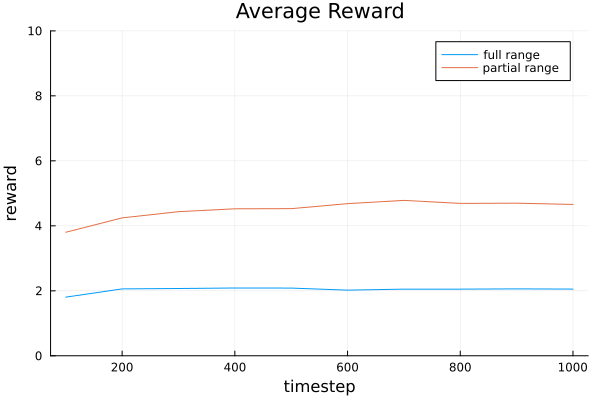

In [58]:
Figs.plot_avg_r_multiple_experiments([r_f, r_p], window, labels, "Average Reward")

In [126]:
# calc avg scaled reward (scaled to max-R arm)
# by construction, first arm is highest reward
s_f_list = cat(s_f1, s_f2, s_f3, s_f4, s_f5, dims=1)
s_p_list = cat(s_p1, s_p2, s_p3, s_p4, s_p5, dims=1)

r_f_scaled = []
for i in 1:length(r_f)
    highest_r = dot(s_f_list[i].u, s_f_list[i].d[1])
    push!(r_f_scaled, r_f[i] ./ highest_r)
end

r_p_scaled = []
for i in 1:length(r_p)
    highest_r = dot(s_p_list[i].u, s_p_list[i].d[1])
    push!(r_p_scaled, r_p[i] ./ highest_r)
end

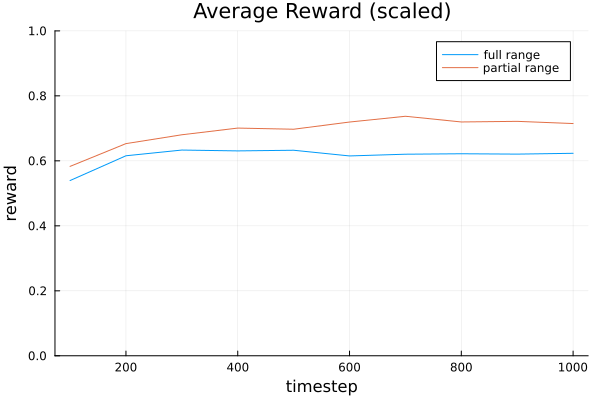

In [131]:
Figs.plot_avg_r_multiple_experiments_normalized([r_f_scaled, r_p_scaled], window, labels, "Average Reward (scaled)")

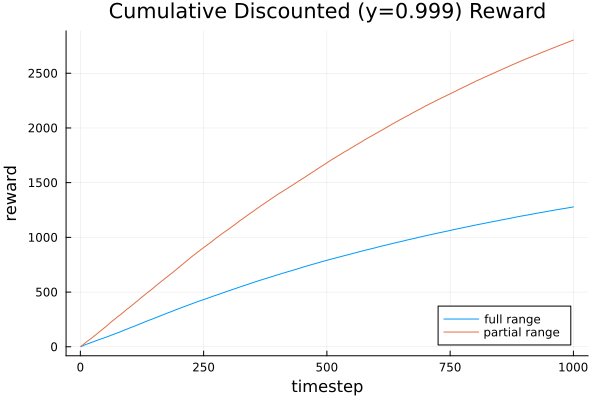

In [59]:
y = 0.999
Figs.plot_cumulative_avg_r_multiple_experiments([r_f, r_p], y, labels, "Cumulative Discounted (y="*string(y)*") Reward")


In [23]:
# Figs.plot_avg_r_multiple_experiments([y8_r, y9_r, y99_r, y999_r], window, y_labels, "Average Reward")

In [24]:
# uncomment to print histograms of first three actions

# println("\ny="*string(y8)*" Histograms (exp "*y8_expID*")")
# Import.print_action_hist(y8_a, actions)

# println("\ny="*string(y9)*" Histograms (exp "*y9_expID*")")
# Import.print_action_hist(y9_a, actions)

# println("\ny="*string(y99)*" Histograms (exp "*y99_expID*")")
# Import.print_action_hist(y99_a, actions)

# println("\ny="*string(y999)*" Histograms (exp "*y999_expID*")")
# Import.print_action_hist(y999_a, actions)

## Action Distributions

In [25]:
Figs.plot_proportion_actions_all(a, actions, window, "exp="*exp_name*" Actions (exp "*exp_ID*")")

LoadError: UndefVarError: exp_name not defined

In [26]:
Figs.plot_proportion_actions_B(a, ["B1", "B2", "B3"], window, "exp="*exp_name*" Actions (exp "*exp_ID*")")

LoadError: UndefVarError: exp_name not defined

In [27]:
actions_single_teacher = ["C1", "C2", "C3", "B"]
Figs.plot_proportion_actions_all(B_a, actions_single_teacher, window, rand_B_name*" Actions ("*rand_B_ID*")")

LoadError: UndefVarError: rand_B_name not defined

In [28]:
Figs.plot_proportion_actions_all(r_a, actions, window, rand_all_name*" ("*rand_all_ID*")")

LoadError: UndefVarError: rand_all_name not defined

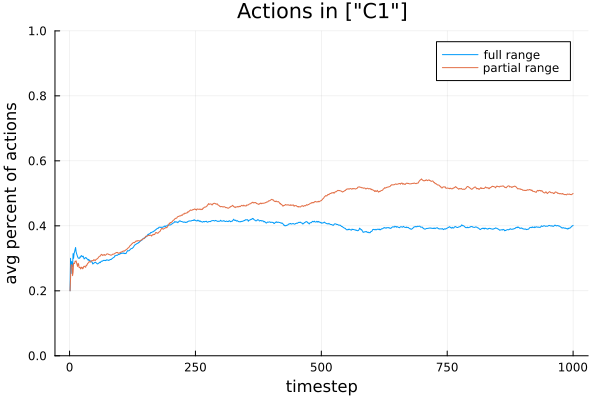

In [60]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a_f, a_p], ["C1"], window, labels, "Actions in ")

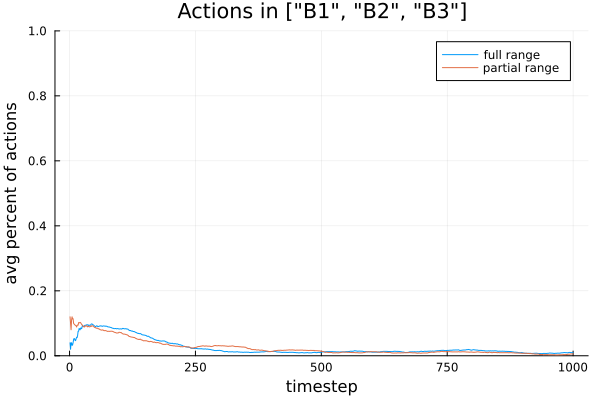

In [61]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a_f, a_p], ["B1", "B2", "B3"], window, labels, "Actions in ")

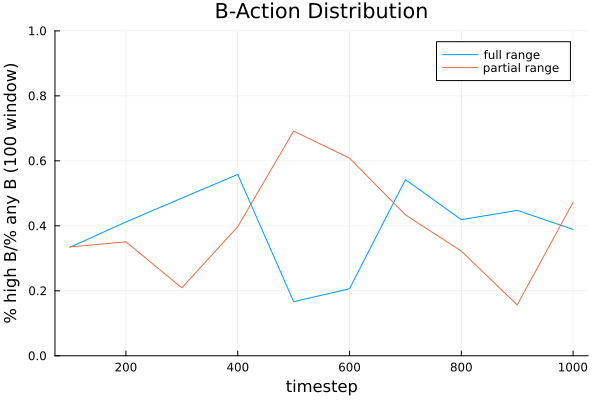

In [62]:
# proportion of actions that are high-B
Figs.plot_proportion_high_B([a_f, a_p], window, labels, ["B3"], ["B1", "B2", "B3"], "B-Action Distribution")

In [32]:
# Figs.plot_proportion_actions_all(y8_a, actions, window, "y="*string(y8)*" Actions (exp "*y8_expID*")")

In [33]:
# Figs.plot_proportion_actions_all(y9_a, actions, window, "y="*string(y9)*" Actions (exp "*y9_expID*")")

In [34]:
# Figs.plot_proportion_actions_all(y99_a, actions, window, "y="*string(y99)*" Actions (exp "*y99_expID*")")

In [35]:
# Figs.plot_proportion_actions_all(y999_a, actions, window, "y="*string(y999)*" Actions (exp "*y999_expID*")")

In [36]:
# Figs.plot_actions_in_list_rolling_multiple_experiments([y8_a, y9_a, y99_a, y999_a], ["C1"], 100, y_labels, "Actions in ")

In [37]:
# Figs.plot_actions_in_list_rolling_multiple_experiments([y8_a, y9_a, y99_a, y999_a], ["B1", "B2"], 100, y_labels, "Actions in ")

In [38]:
# Figs.plot_actions_in_list_rolling_multiple_experiments([y8_a, y9_a, y99_a, y999_a], ["C1", "C2", "C3"], 100, y_labels, "Actions in ")

In [39]:
# # proportion of actions that are high-B
# include("./utils/figs.jl")
# using .Figs
# Figs.plot_proportion_high_B([y8_a, y9_a, y99_a, y999_a], window, y_labels, "B-Action Distribution")

## Belief Dynamics

In [40]:
plot(
    1:length(y8_avg_belief),
    [y8_avg_belief, y9_avg_belief, y99_avg_belief, y999_avg_belief],
    labels = ["y=0.8" "y=0.9" "y=0.99" "y=0.999"],
    title = "belief on converged state",
    legend = :bottomright
)

LoadError: UndefVarError: y8_avg_belief not defined

In [41]:
function print_state(s::State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d1: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d1: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

true_state = y8_s[1]

println("\ntrue state")
print_state(true_state)

println("\ny=0.8 final states")
for s in y8_final_states
    println("")
    print_state(s)
end

println("\ny=0.9 final states")
for s in y9_final_states
    println("")
    print_state(s)
end

println("\ny=0.99 final states")
for s in y99_final_states
    println("")
    print_state(s)
end

println("\ny=0.999 final states")
for s in y999_final_states
    println("")
    print_state(s)
end


LoadError: UndefVarError: y8_s not defined

In [42]:
# NOTE: while these are almost identical, they do differ slightly
plot(
    1:length(y8_avg_belief),
    [y8_avg_belief_u, y9_avg_belief_u, y99_avg_belief_u, y999_avg_belief_u],
    labels = ["y=0.8" "y=0.9" "y=0.99" "y=0.999"],
    title = "belief on converged utility function",
    legend = :bottomright
)

LoadError: UndefVarError: y8_avg_belief not defined

In [53]:
# calc avg MSE between u of true state and u of converged state
# s_f1, t_f1, a_f1, r_f1, beliefs_f1, final_states_f1, avg_belief_f1, avg_belief_u_f1 = Import.import_experiment(full_expIDs[1], runs)

# FULL condition
final_states_f = cat(final_states_f1, final_states_f2, final_states_f3, final_states_f4, final_states_f5, dims=1)
s_f_list = cat(s_f1, s_f2, s_f3, s_f4, s_f5, dims=1)
msd_f = [StatsBase.msd(final_states_f[i].u, s_f_list[i].u) for i in 1:length(s_f_list)]
msd_f_mean = mean(msd_f)
println("mean MSD in FULL condition:\t", round(msd_f_mean,digits=2))

# PARTIAL condition
final_states_p = cat(final_states_p1, final_states_p2, final_states_p3, final_states_p4, final_states_p5, dims=1)
s_p_list = cat(s_p1, s_p2, s_p3, s_p4, s_p5, dims=1)
msd_p = [StatsBase.msd(final_states_p[i].u, s_p_list[i].u) for i in 1:length(s_p_list)]
msd_p_mean = mean(msd_p)
println("mean MSD in PARTIAL condition:\t", round(msd_p_mean,digits=2))

# **scaled** PARTIAL condition
s_p_list_scaled = [[(i-minimum(x.u))*10/(maximum(x.u)-minimum(x.u)) for i in x.u] for x in s_p_list]
final_states_p_scaled = [[(i-minimum(s_p_list[j].u))*10/(maximum(s_p_list[j].u)-minimum(s_p_list[j].u)) for i in final_states_p[j].u] for j in 1:length(s_p_list)]

msd_p_scaled = [StatsBase.msd(final_states_p_scaled[i], s_p_list_scaled[i]) for i in 1:length(s_p_list_scaled)]
msd_p_mean_scaled = mean(msd_p_scaled)
println("mean MSD in SCALED PARTIAL condition:\t", round(msd_p_mean_scaled,digits=2))


mean MSD in FULL condition:	18.56
mean MSD in PARTIAL condition:	9.22
mean MSD in SCALED PARTIAL condition:	20.75
